# Data Visualization in R
## by Diya Das

### The goal
Data visualization, like all visualization, is important because it tells a story. Take a moment to think about what stories you'd like to tell with your data. 

There's an important component of data visualization - deciding what kind of plot is appropriate to make a particular point - that we're not going to talk about today. In fact, today, we're going to make some visualizations that I consider to be pretty bad examples of data visualization, just to show you what is *technically* possible. However, as always, just because you *can* do something, it doesn't mean that you *should* do it. If you're interested in thinking about principles of good visualization, I encourage you to research that topic further. You could start with Edward Tufte.

I'm going to be giving examples of how to make plots in R, using both base R and the occasional `ggplot` command, as well as a 3D plotting library called `rgl`. (Why? because *why should you not gif your data?* Actually, it's because it's sometimes easier to look at relationships among high-dimensional data in 3D, vs. 2D.)

### The datasets
We are going to be using the data from the R package [`nycflights13`](https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf). There are five datasets corresponding to flights departing NYC in 2013. We will **load directly into R from the library**, but the repository also includes TSV files we created for the purposes of the Python demo and can also be used to load the data into our R session.

*** If you've never run Jupyter notebooks with R, please run `conda install -c r r-essentials`

In [1]:
options(repos=structure(c(CRAN="http://cran.cnr.berkeley.edu/", 
BioCsoft="http://www.bioconductor.org/packages/release/bioc/")))
ipak <- function(pkg){
     new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
     if (length(new.pkg))
         install.packages(new.pkg, dependencies = TRUE)
     sapply(pkg, require, character.only = TRUE)
 } #https://gist.github.com/stevenworthington/3178163

pkgs <- c("nycflights13", "ggplot2", "rgl", "NMF", "dplyr","tidyr")
ipak(pkgs)
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=6, repr.plot.height=3)

Loading required package: nycflights13
Loading required package: ggplot2
Loading required package: rgl
Loading required package: NMF
Loading required package: pkgmaker
Loading required package: registry

Attaching package: ‘pkgmaker’

The following object is masked from ‘package:base’:

    isNamespaceLoaded

Loading required package: rngtools
Loading required package: cluster
NMF - BioConductor layer [OK] | Shared memory capabilities [OK] | Cores 3/4
Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:Biobase’:

    combine

The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: tidyr


nycflights13      ggplot2          rgl          NMF        dplyr        tidyr 
        TRUE         TRUE         TRUE         TRUE         TRUE         TRUE

In [2]:
#invisible(sapply(pkgs, library, character.only=TRUE )) 
    # if you knew you had installed the packages

## Basic scatterplots
Let's run through an example using the `flights` dataset. This dataset includes...well what does it include? You could read the documentation, but let's take a look first. 

What are the dimensions of the flights data frame?

In [3]:
flights <- data.frame(flights) # dplyr has introduced a new data format that I am ignoring
flights <- flights[complete.cases(flights),] # remove NAs to reduce some issues
dim(flights)

[1] 327346     19

Figure out the categories of data.

In [4]:
summary(flights)

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 500  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 905  
 Median :2013   Median : 7.000   Median :16.00   Median :1400   Median :1355  
 Mean   :2013   Mean   : 6.565   Mean   :15.74   Mean   :1349   Mean   :1340  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1122   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1554   Median :  -5.000  
 Mean   :  12.56   Mean   :1502   Mean   :1533   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1940   3rd Qu.:1944   3rd Qu.:  14.000  
 Max.   :1301.00   Max.   :2400   Max. 

Let's just look at 1000 random flights in January.

In [5]:
set.seed(5106)
flights <- flights[flights$month==1,]
flights <- flights[sample(1:nrow(flights),1000),]
dim(flights)

[1] 1000   19

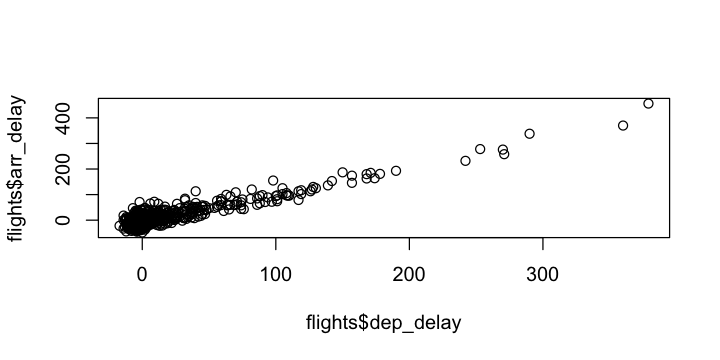

In [6]:
plot(flights$dep_delay, flights$arr_delay)

## Changing aesthetic parameters

What if you prefer:
- filled circles instead of hollow: adjust `pch`
- different color points: adjust `col`
- different sized points: adjust `cex`
- different titles and axis labels: adjust `main` (title), `xlab`, `ylab`

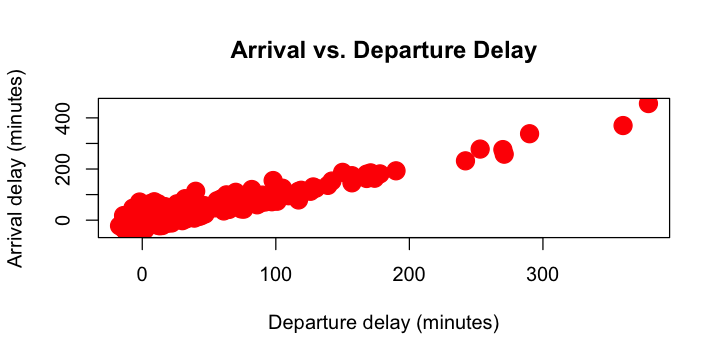

In [7]:
plot(flights$dep_delay, flights$arr_delay, cex=2, pch=19, 
     col="red", main= "Arrival vs. Departure Delay", 
     xlab= "Departure delay (minutes)", ylab="Arrival delay (minutes)")

## Coloring by one variable and adding a legend

In [8]:
# Some tidying for plotting things
flights$origin <- factor(flights$origin) # convert to factor to color by origin in plot 
colpal <- scales::alpha(c("red","green","blue"),0.3) # how to make transparent colors

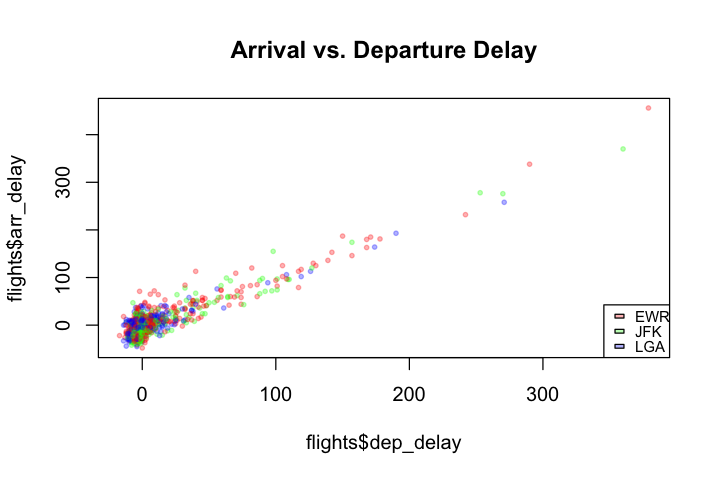

In [9]:
options(repr.plot.width=6, repr.plot.height=4)
plot(flights$dep_delay, flights$arr_delay, cex=0.5, pch=19,
     col=colpal[flights$origin], main= "Arrival vs. Departure Delay")
legend("bottomright",levels(flights$origin),fill=colpal,
       cex=0.75, y.intersp=2)

## Histograms

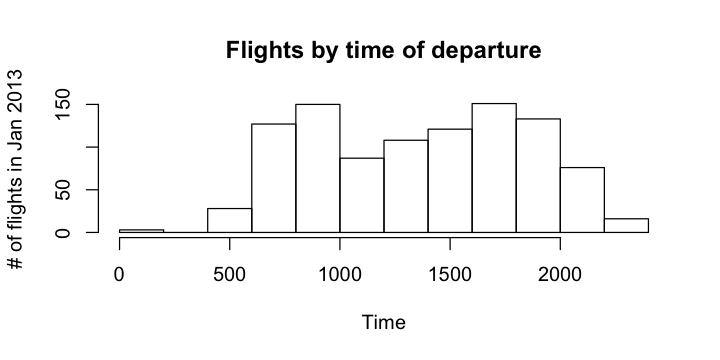

In [10]:
options(repr.plot.width=6, repr.plot.height=3)
hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in Jan 2013")

### Change number of divisions in a histogram

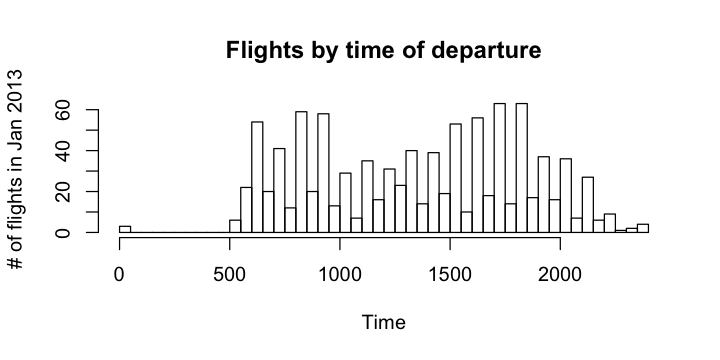

In [11]:
hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in Jan 2013",breaks=50)

### Plot proportions, not frequencies

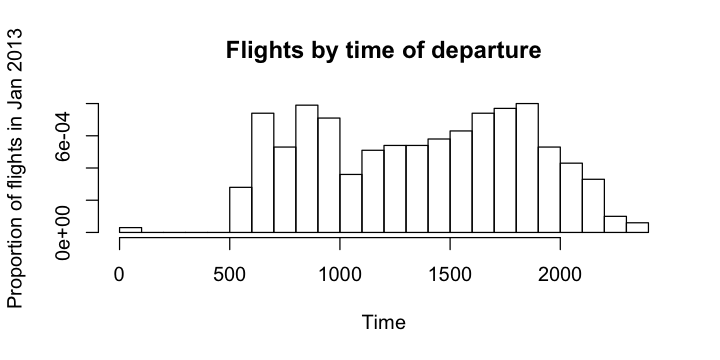

In [12]:
hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "Proportion of flights in Jan 2013",breaks=24, freq=FALSE)

## Plot organization and margins

What if you want to have two plots side by side, or change the margins?
In R, this is controlled by `par`.

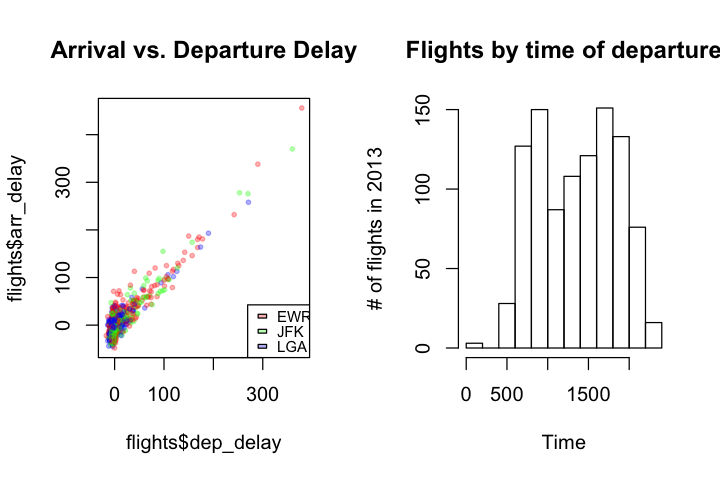

In [13]:
options(repr.plot.width=6, repr.plot.height=4)
par(mfrow=c(1,2)) # 1 row, 2 columns

plot(flights$dep_delay, flights$arr_delay, cex=0.5, pch=19,
     col=colpal[flights$origin], main= "Arrival vs. Departure Delay")
legend("bottomright",levels(flights$origin),fill=colpal,
       cex=0.75, y.intersp=2, xpd=FALSE)

hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in 2013")


In [14]:
par.defaults <- par() # save default plot parameters before we mess around
par.defaults

$xlog
[1] FALSE

$ylog
[1] FALSE

$adj
[1] 0.5

$ann
[1] TRUE

$ask
[1] FALSE

$bg
[1] "transparent"

$bty
[1] "o"

$cex
[1] 1

$cex.axis
[1] 1

$cex.lab
[1] 1

$cex.main
[1] 1.2

$cex.sub
[1] 1

$cin
[1] 0.15 0.20

$col
[1] "black"

$col.axis
[1] "black"

$col.lab
[1] "black"

$col.main
[1] "black"

$col.sub
[1] "black"

$cra
[1] 10.8 14.4

$crt
[1] 0

$csi
[1] 0.2

$cxy
[1] 0.02604167 0.03875969

$din
[1] 7 7

$err
[1] 0

$family
[1] ""

$fg
[1] "black"

$fig
[1] 0 1 0 1

$fin
[1] 7 7

$font
[1] 1

$font.axis
[1] 1

$font.lab
[1] 1

$font.main
[1] 2

$font.sub
[1] 1

$lab
[1] 5 5 7

$las
[1] 0

$lend
[1] "round"

$lheight
[1] 1

$ljoin
[1] "round"

$lmitre
[1] 10

$lty
[1] "solid"

$lwd
[1] 1

$mai
[1] 1.02 0.82 0.82 0.42

$mar
[1] 5.1 4.1 4.1 2.1

$mex
[1] 1

$mfcol
[1] 1 1

$mfg
[1] 1 1 1 1

$mfrow
[1] 1 1

$mgp
[1] 3 1 0

$mkh
[1] 0.001

$new
[1] FALSE

$oma
[1] 0 0 0 0

$omd
[1] 0 1 0 1

$omi
[1] 0 0 0 0

$page
[1] TRUE

$pch
[1] 1

$pin
[1] 5.76 5.16

$plt
[1] 0.1171429 0.9400000 0.1457143 0.8828571

$ps
[1] 12

$pty
[1] "m"

$smo
[1] 1

$srt
[1] 0

$tck
[1] NA

$tcl
[1] -0.5

$usr
[1] 0 1 0 1

$xaxp
[1] 0 1 5

$xaxs
[1] "r"

$xaxt
[1] "s"

$xpd
[1] FALSE

$yaxp
[1] 0 1 5

$yaxs
[1] "r"

$yaxt
[1] "s"

$ylbias
[1] 0.2

## Dot plots with jitter
## Turning off axes and labels

Warning message in par(par.defaults):
“graphical parameter "cin" cannot be set”Warning message in par(par.defaults):
“graphical parameter "cra" cannot be set”Warning message in par(par.defaults):
“graphical parameter "csi" cannot be set”Warning message in par(par.defaults):
“graphical parameter "cxy" cannot be set”Warning message in par(par.defaults):
“graphical parameter "din" cannot be set”Warning message in par(par.defaults):
“graphical parameter "page" cannot be set”

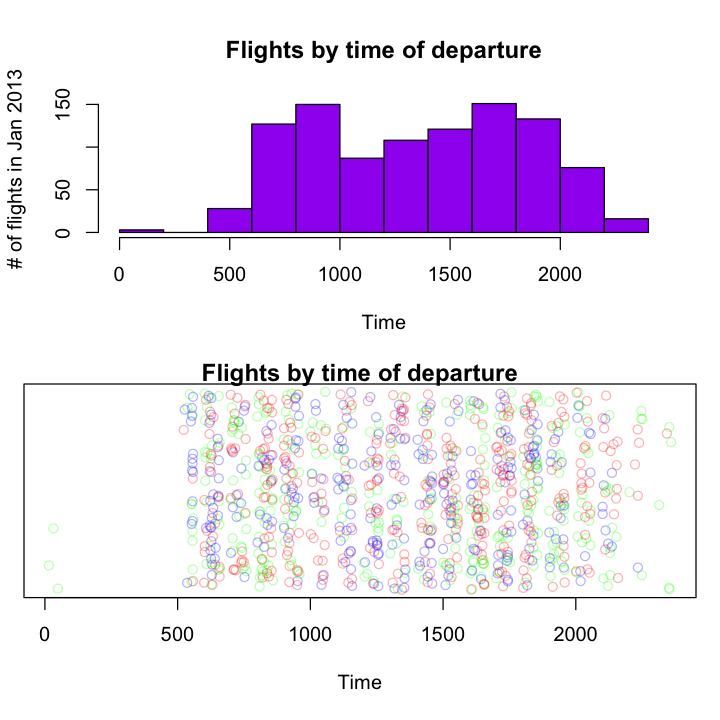

In [15]:
options(repr.plot.width=6, repr.plot.height=6)
par(mfrow=c(2,1))
hist(flights$dep_time, main="Flights by time of departure", 
     xlab="Time", ylab = "# of flights in Jan 2013", col="purple")

par(mar=c(5.1,1,1,1)) # change margins for second plot
plot(flights$dep_time, jitter(rep(0, nrow(flights)), 0.3),
     main="Flights by time of departure", col=colpal[flights$origin],yaxt='n', ylab='',
    xlab = "Time")


# now reset to default margins and plot layout (1 x 1)
par(par.defaults)

## Boxplot numerical variable by categorical variable

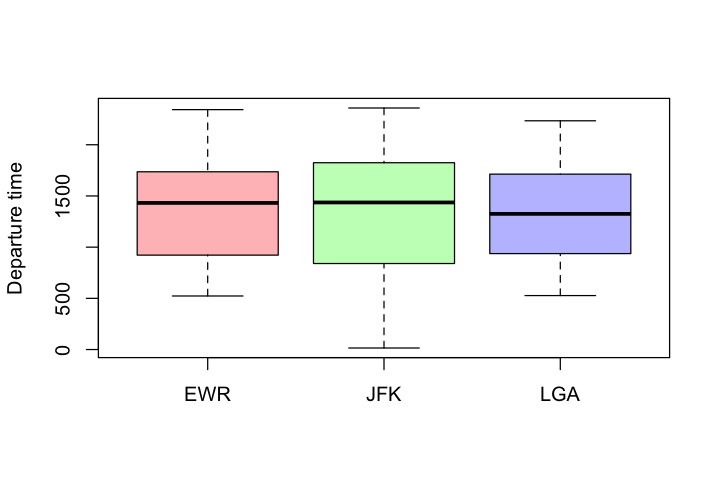

In [16]:
options(repr.plot.width=6, repr.plot.height=4)
boxplot(dep_time ~ origin, data=flights, col=colpal, ylab='Departure time')

## Bubble plots and diving into `ggplot`
Bubble plots are useful for plotting three variables at once, where the third variable is some numerical quantity.

Let's plot flights by origin and carrier. First, we need to construct a long-formatted data frame for input to `ggplot` (see Data Tidying and Manipulation notebook).

In [17]:
origin_carrier <- reshape2::melt(
    prop.table(table(Origin=factor(flights$origin), 
                     Carrier=factor(flights$carrier)), 1), 
               value.name="Proportion")

head(origin_carrier)
rowSums(prop.table(table(Origin=factor(flights$origin), 
                     Carrier=factor(flights$carrier)), 1))
# Each carrier as a fraction of flights out of that airport

Origin,Carrier,Proportion
EWR,9E,0.005347594
JFK,9E,0.181547619
LGA,9E,0.017241379
EWR,AA,0.026737968
JFK,AA,0.142857143
LGA,AA,0.151724138


EWR JFK LGA 
  1   1   1

## `ggplot`: A conceptual introduction

`ggplot` is based on the **grammar of graphics** - that is, a component-based approach to building graphics:

- data
- coordinate system
- geoms: visual representation of data
    - aesthetics: size, color, x, y locations

The template is as follows, from the very helpful cheatsheet from RStudio:

`ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(mapping=aes(<MAPPINGS>),stat= <STAT>,position=<POSITION>) +
  <COORDINATE_FUNCTION> + <FACET_FUNCTION> + <SCALE_FUNCTION> + <THEME_FUNCTION>`

Create the base plot, describing what data are to be plotted. Note the size statement, with the `ifelse`: this is to alter the default behavior of `ggplot` which plots zeros as a tiny point, to distinguish them from `NA`s.

In [18]:
or_car.plt <- ggplot(origin_carrier, 
                     aes(Carrier, Origin, size=ifelse(Proportion==0, NA, Proportion)))

Now, for plotting:

- `geom_point` is a `GEOM_FUNCTION` that tells `ggplot` we want to plot points.
- `scale_size_area` is a `SCALE_FUNCTION`

In [19]:
pdf("bubble.pdf", width=6, height=4)
plt2 <- or_car.plt + geom_point(color = "blue") + 
   scale_size_area(max_size=20, name='Proportion', breaks=c(0.1, 0.25, 0.5))
plt2
dev.off()

Warning message:
“Removed 11 rows containing missing values (geom_point).”

pdf 
  2

Warning message:
“Removed 11 rows containing missing values (geom_point).”

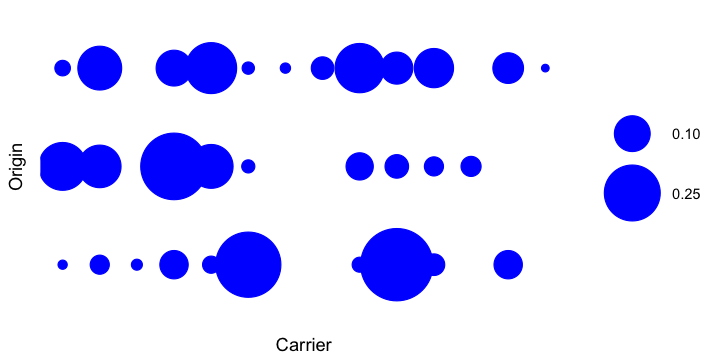

In [20]:
options(repr.plot.width=6, repr.plot.height=3)
theme1 <- theme(plot.background=element_blank(), panel.grid.minor=element_blank(), 
            panel.border=element_blank(), panel.background=element_blank(), 
            axis.line=element_blank(),axis.ticks=element_blank(), 
            legend.title=element_blank(), legend.background=element_blank(), 
            axis.text.x=element_blank(), axis.text.y=element_blank(),
            legend.key= element_rect(fill="white"))
plt2 + theme1

Warning message:
“Removed 11 rows containing missing values (geom_point).”

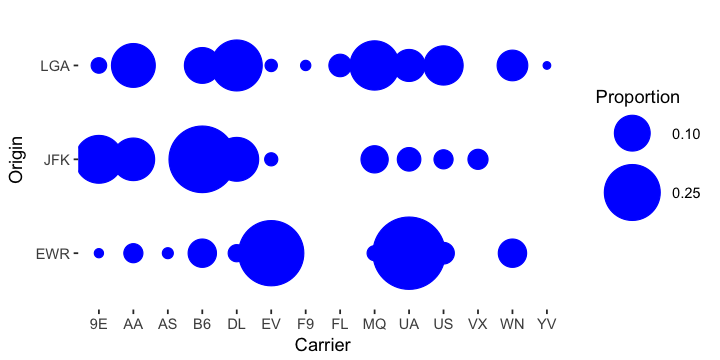

In [21]:
theme2 <- theme(plot.background=element_blank(), 
            panel.background=element_blank(), 
            legend.background=element_blank(), 
            legend.key= element_rect(fill="white"))
plt2 + theme2

## Stacked bar plots

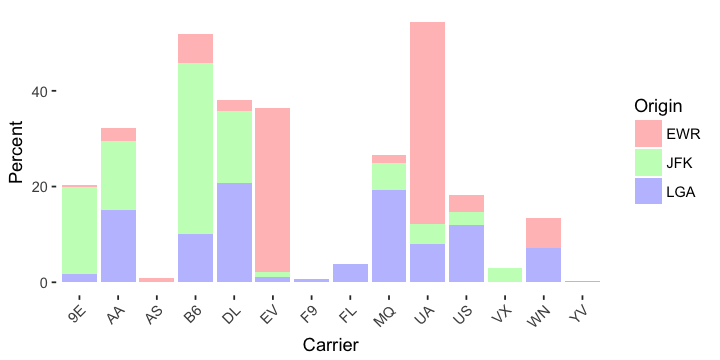

In [22]:
ggplot(origin_carrier, aes(x = Carrier, y = Proportion*100, fill = factor(Origin))) +
  geom_bar(stat = "identity") + 
  scale_fill_manual(values=colpal, name="Origin") + theme_bw() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
      panel.border=element_blank(),
      axis.text.x = element_text(angle = 45, vjust = 1, hjust=1)) +ylab("Percent")

## More with `ggplot`: Going back over some of the graphics we've already made in base R

### Basic scatterplots

`geom_smooth()` using method = 'loess'


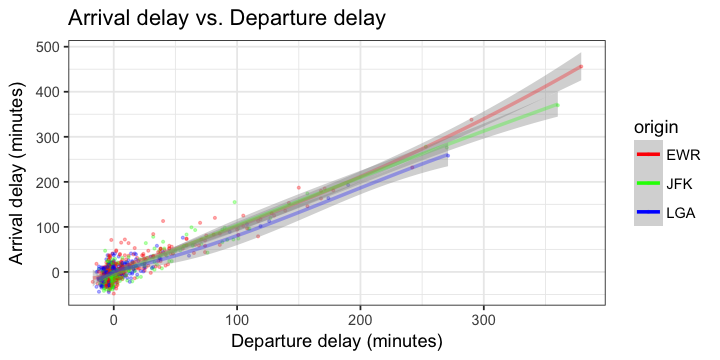

In [23]:
delay.plt <- ggplot(data=flights, aes(dep_delay, arr_delay,colour=origin)) 
delay.plt + geom_point(size=0.5) + 
ggtitle('Arrival delay vs. Departure delay') + theme(plot.title = element_text(hjust = 0.5)) +
theme_bw() +
xlab('Departure delay (minutes)') + ylab('Arrival delay (minutes)') +
scale_colour_manual(values=colpal)+
geom_smooth()

### Histograms

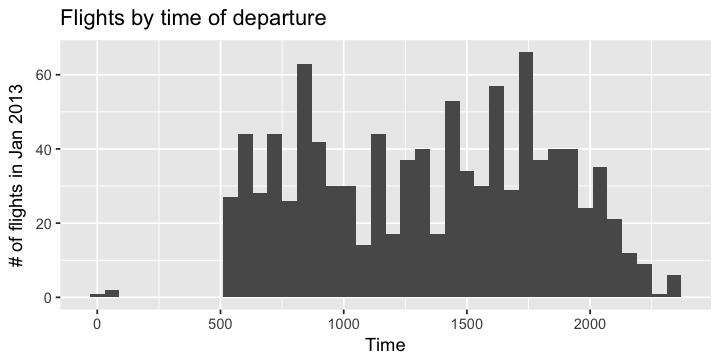

In [24]:
ggplot(data=flights, aes(dep_time)) + geom_histogram(binwidth=60) + 
  ggtitle("Flights by time of departure")+ xlab("Time") + ylab ("# of flights in Jan 2013")

### Dot plots

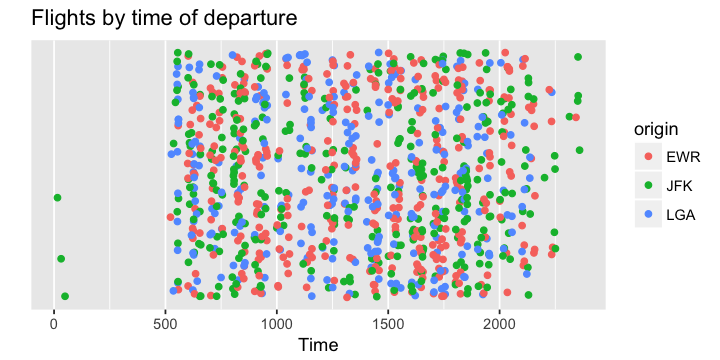

In [25]:
ggplot(data=flights, aes(dep_time, rep(0, nrow(flights))))+ geom_jitter(aes(colour = origin)) +
  ggtitle('Flights by time of departure') + xlab('Time') +
  scale_y_continuous(breaks=NULL) + ylab('')
suppressWarnings(par(par.defaults))

### Boxplots

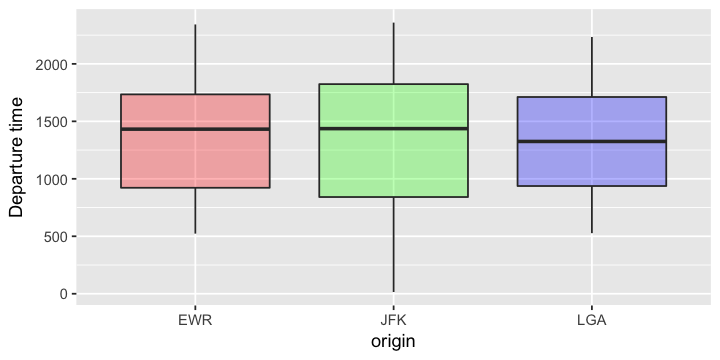

In [26]:
ggplot(data=flights, aes(origin,dep_time)) + geom_boxplot(fill=colpal) + ylab('Departure time')

## Faceting with `ggplot2`

`geom_smooth()` using method = 'loess'


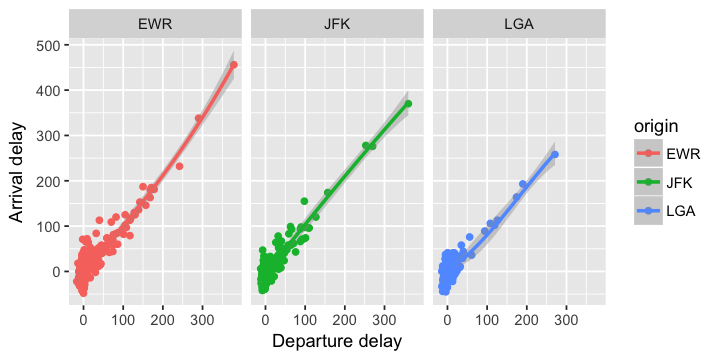

In [27]:
options(repr.plot.width=6, repr.plot.height=3)
delay.plt + geom_point() + geom_smooth() + facet_grid(. ~ origin) +
ylab('Arrival delay') + xlab('Departure delay')

## Heatmaps

In [28]:
airtime <- left_join(flights, airports, by = c("dest" = "faa")) %>% 
    select(origin, dest=name, air_time) %>% 
    group_by(origin, dest) %>% 
    summarize(avg_air_time = mean(air_time))
avg_air <- data.frame(drop_na(spread(airtime, origin, avg_air_time)))
rownames(avg_air) <- avg_air$dest
head(avg_air)

,dest,EWR,JFK,LGA
Charlotte Douglas Intl,Charlotte Douglas Intl,91.61538,92.38462,91.66667
Chicago Ohare Intl,Chicago Ohare Intl,122.46154,129.80000,125.56522
Cincinnati Northern Kentucky Intl,Cincinnati Northern Kentucky Intl,103.71429,107.66667,110.00000
Cleveland Hopkins Intl,Cleveland Hopkins Intl,71.36364,75.00000,73.80000
Dallas Fort Worth Intl,Dallas Fort Worth Intl,218.15385,207.00000,216.54545
Denver Intl,Denver Intl,241.87500,262.00000,238.09091


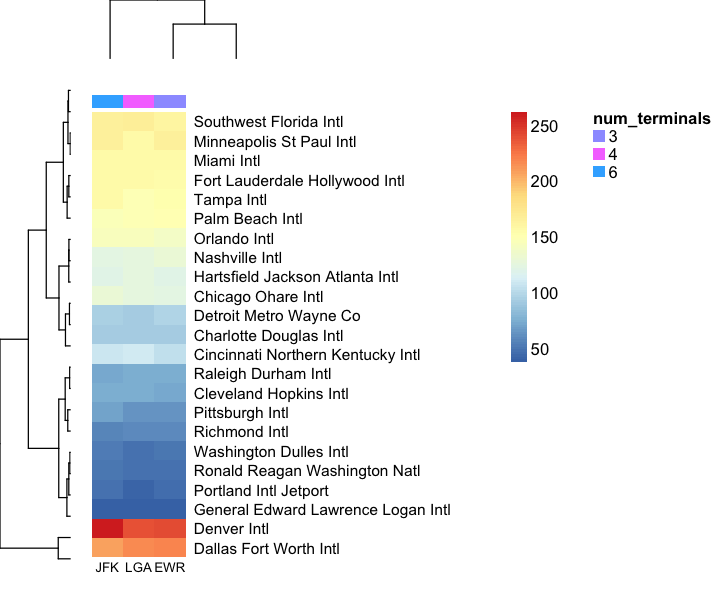

In [29]:
options(repr.plot.width=6, repr.plot.height=5)
terminals <- c("3","6","4") # Number of current terminals, as per Wikipedia
aheatmap(avg_air[,2:ncol(avg_air)], annCol=data.frame(num_terminals=terminals), cexCol=0.8)

## 3D plotting

In [30]:
plot3d(flights$distance, flights$air_time, flights$arr_delay)
par3d(windowRect = c(20, 30, 800, 800))
print(getwd())
movie3d(spin3d(), 5, movie = "movie", frames = "movie", dir = getwd(), 
                    convert = TRUE, clean = TRUE, verbose=TRUE,
                    top = TRUE, type = "gif") 
rgl.close()

[1] "/Users/diyadas/gitp/tutorials"
Writing 'movie050.png'
Will create: /Users/diyadas/gitp/tutorials/movie.gif
Executing: 'convert -delay 1x10 movie*.png movie.gif'
Deleting frames


## Pairs plots: 2D representations of high-dimensional data

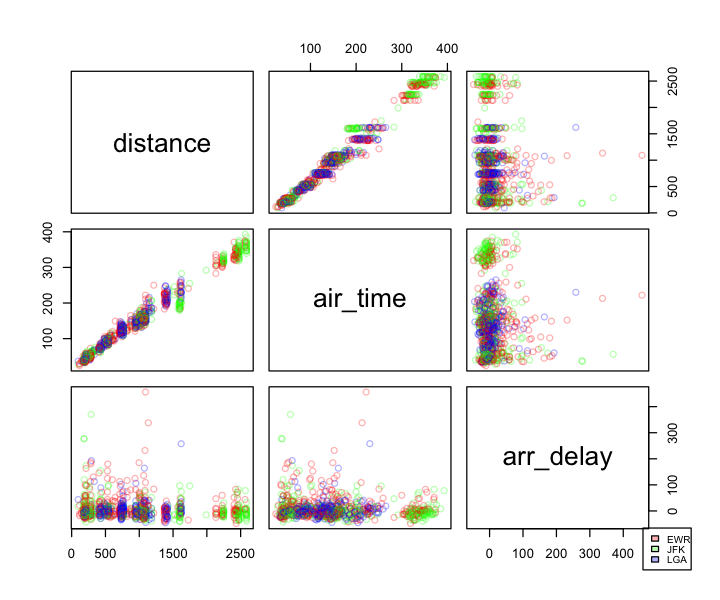

In [31]:
pairs(flights[,c("distance","air_time", "arr_delay")], col=colpal[flights$origin])
legend("bottomright",levels(flights$origin),fill=colpal,cex=0.5, xpd=TRUE)